In [15]:
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
from utils import *

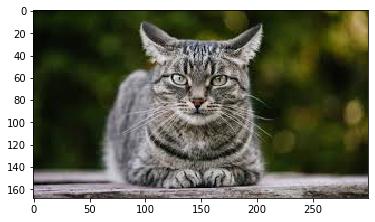

In [16]:
img = open_image('Cat01.jpeg', path='images/')
height, width = img.size
pixels = list(img.getdata())
red, green, blue = convert_pixel_to_df(pixels, height, width)
imshow(np.asarray(img))

In [17]:
pixels[:11] ** 

[(7, 18, 2),
 (8, 19, 3),
 (9, 20, 4),
 (10, 21, 5),
 (11, 22, 6),
 (12, 23, 7),
 (13, 24, 8),
 (13, 24, 8),
 (12, 23, 7),
 (12, 23, 7),
 (11, 22, 6)]

In [18]:
img.getpixel((0, 10))

(17, 29, 5)

In [88]:
red[0:10,0:10]

array([[  7,   8,   9,  10,  11,  12,  13,  13,  12,  12],
       [ 55,  57,  63,  71,  78,  84,  90,  92,  93,  92],
       [ 20,  20,  20,  20,  17,  17,  17,  18,  18,  18],
       [ 22,  23,  24,  24,  23,  23,  23,  24,  24,  24],
       [ 25,  26,  27,  28,  30,  31,  33,  33,  33,  33],
       [ 27,  27,  27,  28,  29,  29,  30,  32,  32,  32],
       [ 32,  31,  30,  29,  29,  29,  29,  29,  29,  29],
       [ 69,  77,  87,  93,  99, 106, 115, 121, 128, 138],
       [ 30,  30,  28,  28,  26,  24,  23,  23,  25,  25],
       [ 17,  17,  16,  16,  16,  17,  18,  20,  22,  24]])

In [21]:
# Pixel manipulation only
new = create_image(height, width)
newImg = new.load()
for y in range(height):
    for x in range(width):
        r, g, b = red[x, y], green[x, y], red[x, y]
        
        #     r *= 0.99
        #     g *= 0.90
        #     b *= 0.82

        newImg[x, y] = (red[x, y], green[x, y], red[x, y])

imshow(np.asarray(new))

IndexError: index 168 is out of bounds for axis 1 with size 168

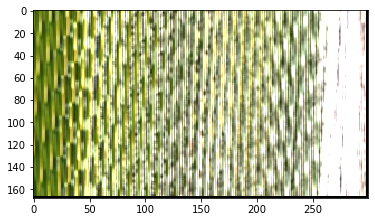

In [97]:
new = create_image(height, width)
newImg = new.load()
s = 3
matrix = [[0.79, 0.67, 0.89], [0.34, 0.80, 0.9], [1, 1, 1]]
for y in range(height - s + 1):
    for x in range(width - s + 1):
        for i in range(s):
            for j in range(s):
                avgRed = int(np.mean(np.dot(red[y:y+s, x:x+s], matrix)))
                avgGreen = int(np.mean(np.dot(green[y:y+s, x:x+s], matrix)))
                avgBlue = int(np.mean(np.dot(blue[y:y+s, x:x+s], matrix)))
        
        newImg[y, x] = (avgRed, avgGreen, avgBlue)

imshow(np.asarray(new))

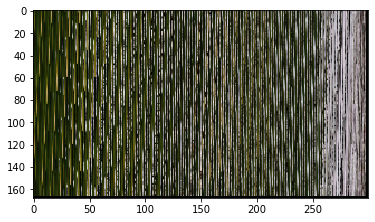

In [6]:
new = create_image(height, width)
newImg = new.load()
s = 3
matrix = [[0, 1, 0], [0, 1, 0], [0, 1, 0]]
for y in range(height - s + 1):
    for x in range(width - s + 1):
        for i in range(s):
            avgRed = int(red[y, x] * 1)
            avgGreen = green[y, x]
            avgBlue = blue[y, x]
            # for j in range(s):
            #     if red[y, x] >= 50 and red[y, x] >= 50 and red[y, x] >= 50:
            #         avgRed = int(np.mean(np.dot(red[y:y+s, x:x+s], matrix)) * 0.90) 
            #         avgGreen = int(np.mean(np.dot(green[y:y+s, x:x+s], matrix)) * 0.97)
            #         avgBlue = int(np.mean(np.dot(blue[y:y+s, x:x+s], matrix))*( 0.98))
        
        newImg[y, x] = (avgRed, avgGreen, avgBlue)

imshow(np.asarray(new))